In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


## load dataset

In [ ]:
from pathlib import Path

# Convert the string to a Path object
save_dir = Path('/content/drive/MyDrive/Data-science-project/journal-article')

!pip install dowhy
!pip install dowhy[graphviz]

import pandas as pd
import numpy as np
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings

# Suppress some common warnings for cleaner output
warnings.filterwarnings('ignore')

df = pd.read_csv(save_dir / 'global_data.csv')
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.2/399.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.6.7
    Uninstalling cvxpy-1.6.7:
      Successfully uninstalled cvxpy-1.6.7


,avg_ipt,bytes_in,bytes_out,num_pkts_in,num_pkts_out,entropy,total_entropy,src_port,dest_port,proto,duration,src_ip,dest_ip,time_start,time_end,label_encoded
0,-0.034063,-0.198464,-0.521970,-0.261112,-0.284016,-1.302101,-0.239583,-1.518713,1.086840,-0.04713,-0.139679,-0.218937,-0.078514,0.332131,0.332248,0
1,-0.034063,-0.198464,1.710874,-0.261112,0.241871,-0.401739,0.350688,0.231615,-0.272775,-0.04713,-0.139659,-0.218937,-0.078514,0.327224,0.327342,0
2,-0.034063,-0.198464,-0.500382,-0.261112,-0.225584,0.387283,-0.228875,0.900498,-0.775411,-0.04713,-0.139559,-0.218937,-0.078514,0.332324,0.332441,1
3,-0.034060,-0.090518,-0.492517,0.319441,0.008144,0.669043,-0.198441,0.544709,-0.775411,-0.04713,0.075428,-0.218937,-0.078514,-2.964871,-3.293513,1
4,-0.034063,-0.198464,-0.008632,-0.261112,-0.167152,0.800991,0.077401,-0.012531,-0.272775,-0.04713,-0.139678,-0.218937,-0.078514,0.332325,0.332442,0


# Causal inference

## first trial - playing around


🔍 Exploring treatment: proto ➝ Outcome: bytes_in


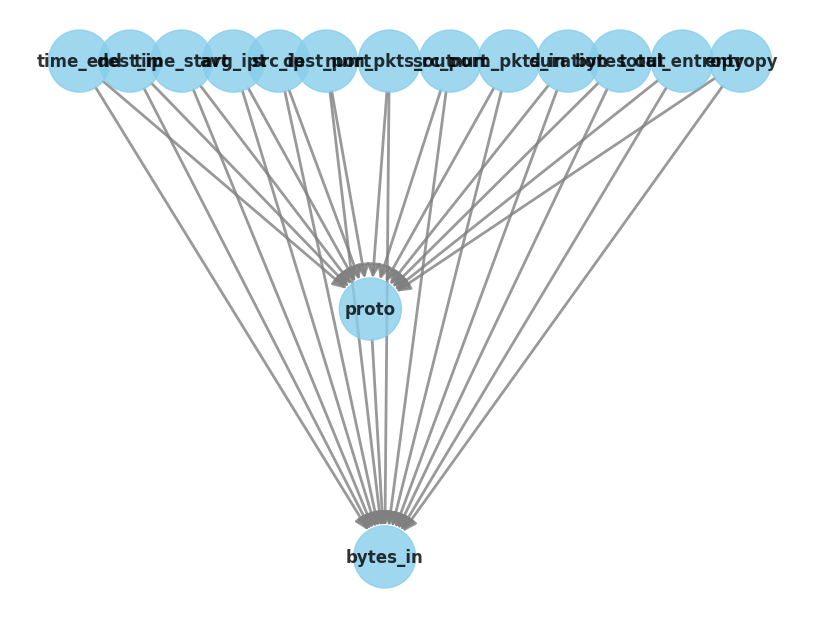

ATE for proto ➝ bytes_in: 0.010977383078815711


Refutation result:
Refute: Use a Placebo Treatment
Estimated effect:0.010977383078815711
New effect:-6.006480035569695e-17
p value:0.0


🔍 Exploring treatment: avg_ipt ➝ Outcome: bytes_in


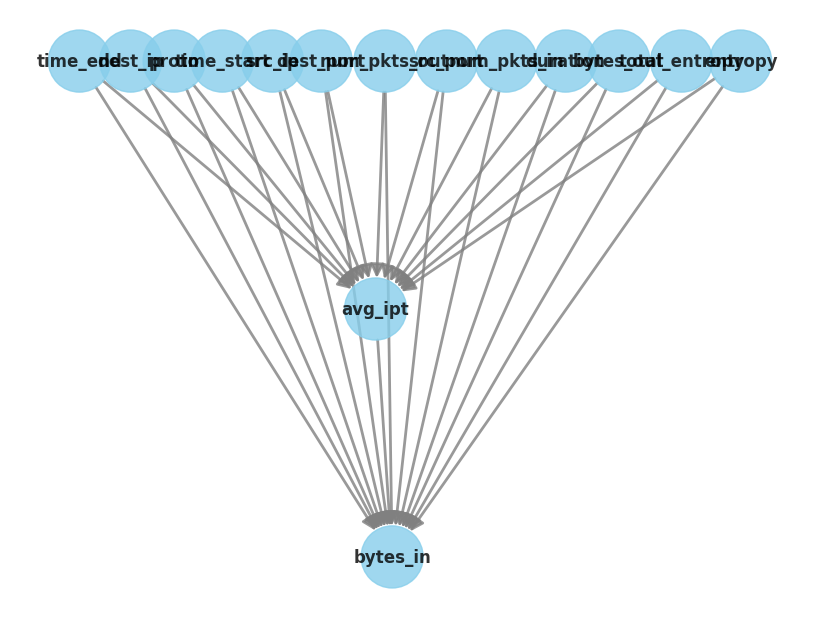

ATE for avg_ipt ➝ bytes_in: 0.0030705465554498987


Refutation result:
Refute: Use a Placebo Treatment
Estimated effect:0.0030705465554498987
New effect:4.7921736023859296e-17
p value:0.0


🔍 Exploring treatment: dest_port ➝ Outcome: bytes_in


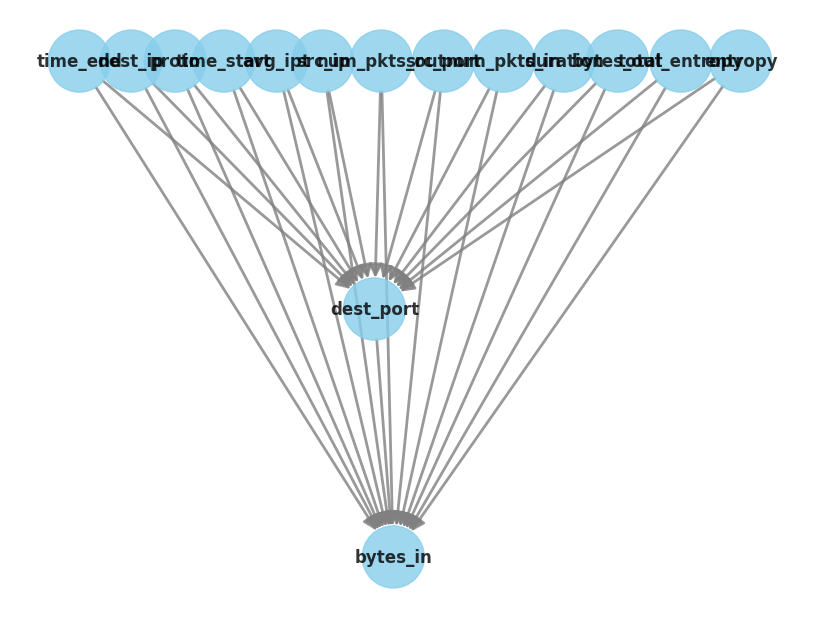

ATE for dest_port ➝ bytes_in: 0.14170510278418058


Refutation result:
Refute: Use a Placebo Treatment
Estimated effect:0.14170510278418058
New effect:-4.206704429243757e-17
p value:0.0


🔍 Exploring treatment: num_pkts_out ➝ Outcome: bytes_in


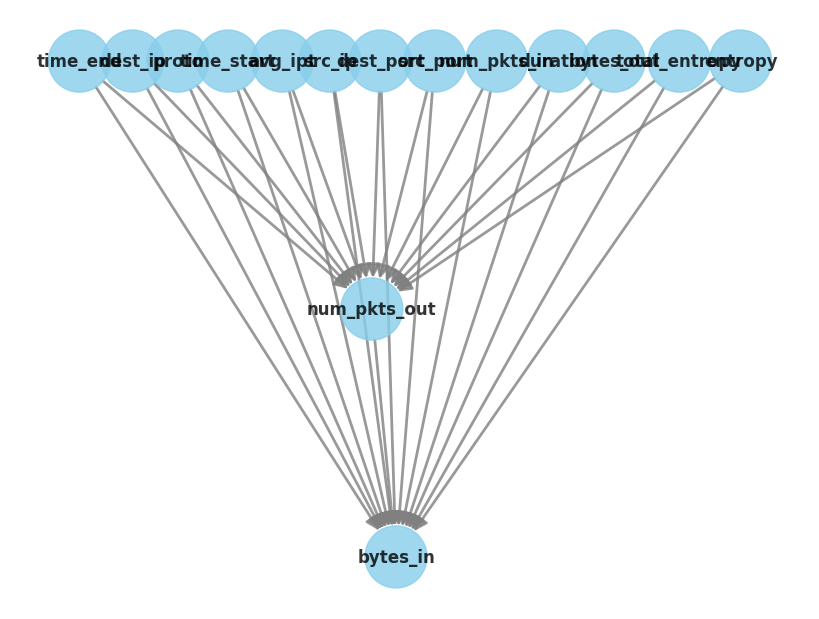

ATE for num_pkts_out ➝ bytes_in: 0.09830497339312083


Refutation result:
Refute: Use a Placebo Treatment
Estimated effect:0.09830497339312083
New effect:-1.1752751549742868e-16
p value:0.0


🔍 Exploring treatment: src_port ➝ Outcome: bytes_in


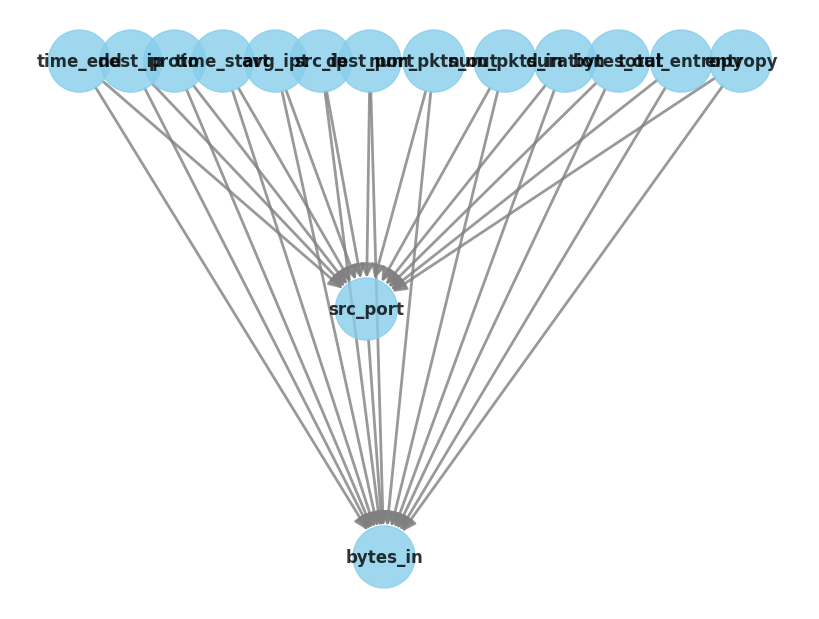

ATE for src_port ➝ bytes_in: -0.018641408376296235


Refutation result:
Refute: Use a Placebo Treatment
Estimated effect:-0.018641408376296235
New effect:6.071532165918825e-18
p value:0.0


🔍 Exploring treatment: num_pkts_in ➝ Outcome: bytes_in


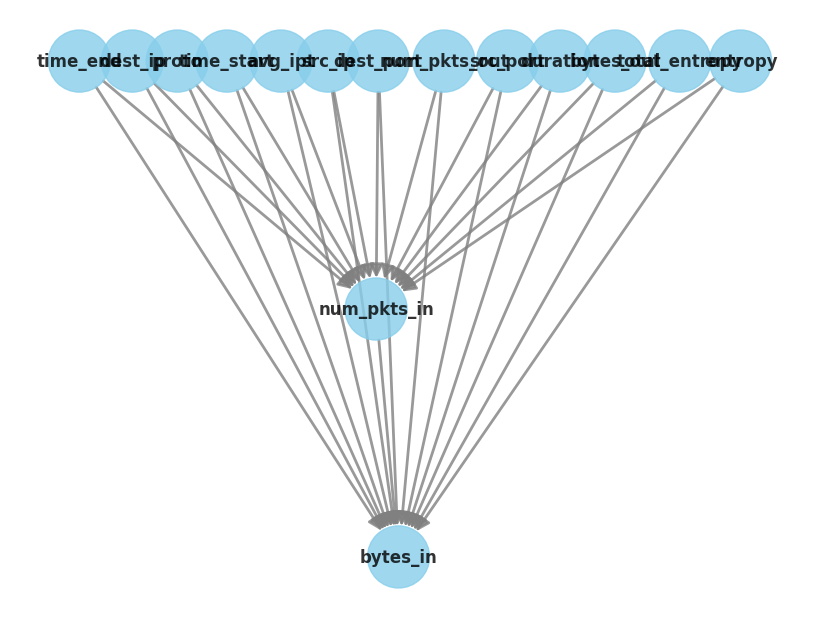

ATE for num_pkts_in ➝ bytes_in: 0.5475776615976451


Refutation result:
Refute: Use a Placebo Treatment
Estimated effect:0.5475776615976451
New effect:-1.3227266504323154e-17
p value:0.0


🔍 Exploring treatment: duration ➝ Outcome: bytes_in


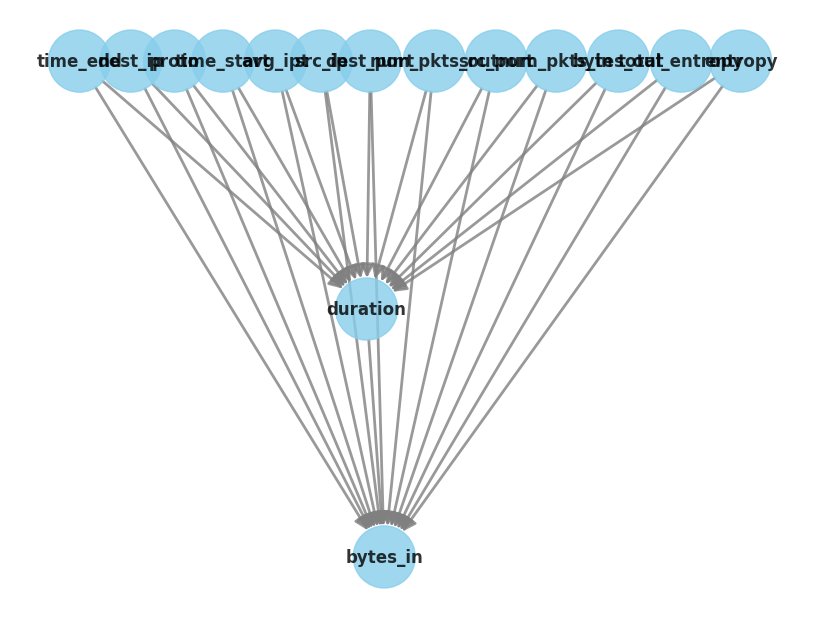

ATE for duration ➝ bytes_in: 0.0453293187087014


Refutation result:
Refute: Use a Placebo Treatment
Estimated effect:0.0453293187087014
New effect:-8.695301423333746e-17
p value:0.0


🔍 Exploring treatment: bytes_out ➝ Outcome: bytes_in


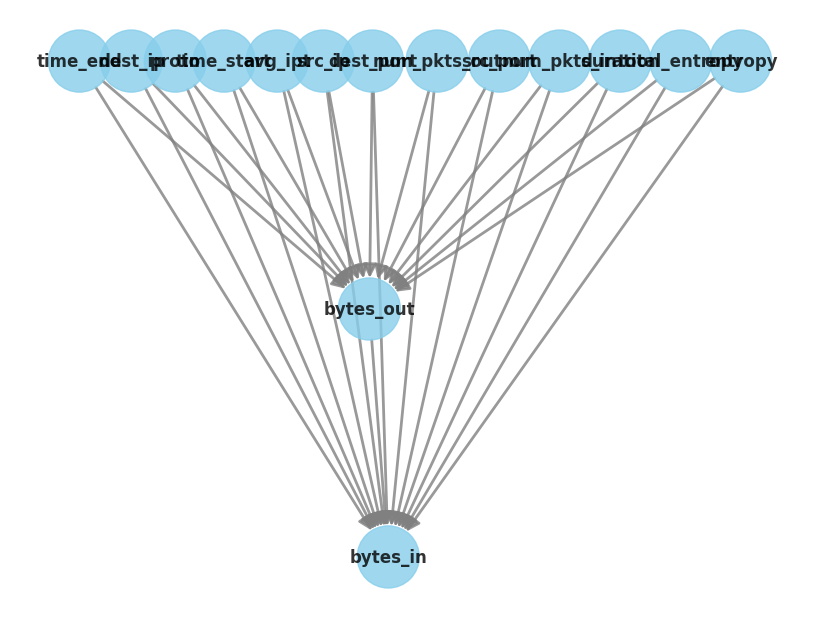

ATE for bytes_out ➝ bytes_in: -0.04031518432480088


Refutation result:
Refute: Use a Placebo Treatment
Estimated effect:-0.04031518432480088
New effect:-1.1470858984896637e-16
p value:0.0


🔍 Exploring treatment: total_entropy ➝ Outcome: bytes_in


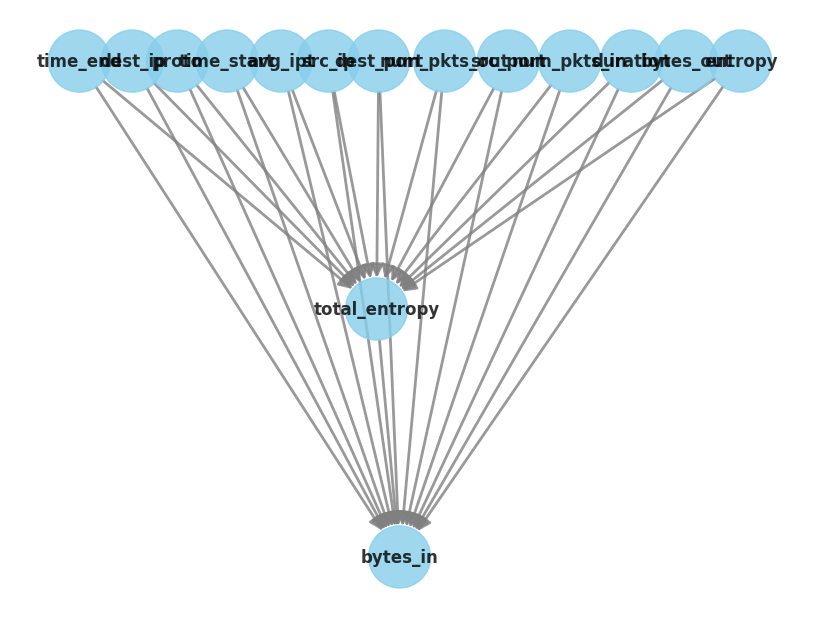

ATE for total_entropy ➝ bytes_in: 0.3054575569587577


Refutation result:
Refute: Use a Placebo Treatment
Estimated effect:0.3054575569587577
New effect:-8.044780119842443e-17
p value:0.0


🔍 Exploring treatment: entropy ➝ Outcome: bytes_in


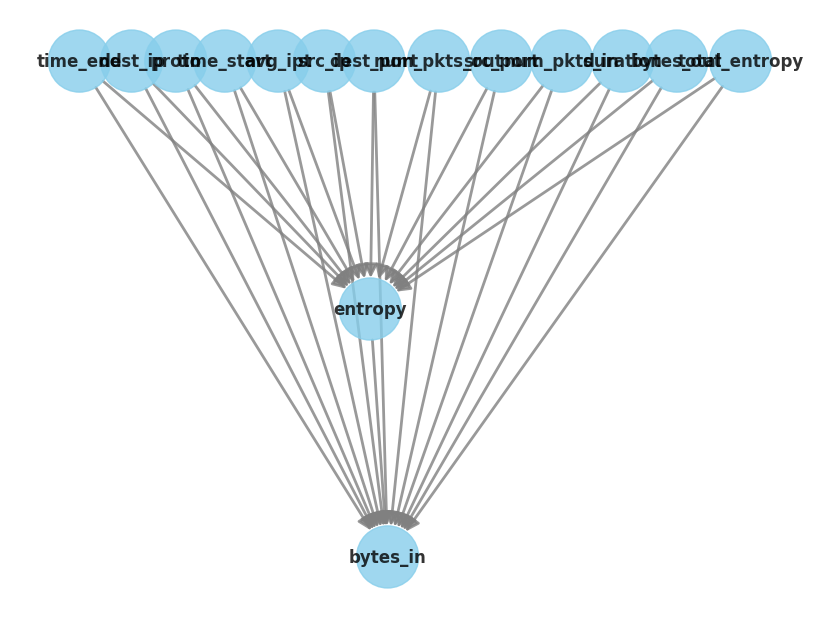

ATE for entropy ➝ bytes_in: -0.023467492923307944
Refutation result:
Refute: Use a Placebo Treatment
Estimated effect:-0.023467492923307944
New effect:-7.806255641895632e-17
p value:0.0


✅ All treatment explorations complete. Results saved to CSV.


In [ ]:
import pandas as pd
import numpy as np
from dowhy import CausalModel
from sklearn.model_selection import train_test_split

# Columns (in the specified causal order)
ordered_columns = [
    "time_end", "dest_ip", "proto", "time_start", "avg_ipt", "src_ip", "dest_port",
    "num_pkts_out", "src_port", "num_pkts_in", "duration", "bytes_out",
    "total_entropy", "entropy", "bytes_in"
]

df = df[ordered_columns]

# Define potential outcome variable(s)
outcome = "bytes_in"

# Candidate treatments (excluding outcome and non-informative vars)
treatment_candidates = [col for col in ordered_columns if col != outcome and col not in ["src_ip", "dest_ip", "time_start", "time_end"]]

# Store results
results = []

for treatment in treatment_candidates:
    print(f"\n🔍 Exploring treatment: {treatment} ➝ Outcome: {outcome}")

    # Define DoWhy causal model
    model = CausalModel(
        data=df,
        treatment=treatment,
        outcome=outcome,
        common_causes=[col for col in df.columns if col not in [treatment, outcome]],
    )

    # View model graph
    model.view_model(layout="dot")  # comment this line if running on headless systems

    # Identification
    identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

    # Estimation
    estimate = model.estimate_effect(
        identified_estimand,
        method_name="backdoor.linear_regression"
    )

    print(f"ATE for {treatment} ➝ {outcome}: {estimate.value}")

    # Refutation
    refutation = model.refute_estimate(
        identified_estimand,
        estimate,
        method_name="placebo_treatment_refuter"
    )

    print(f"Refutation result:\n{refutation}")

    # Save results
    results.append({
        "treatment": treatment,
        "outcome": outcome,
        "estimate": estimate.value,
        "refutation": str(refutation)
    })

# Convert to DataFrame for analysis
results_df = pd.DataFrame(results)
results_df.to_csv("dowhy_treatment_exploration.csv", index=False)
print("\n✅ All treatment explorations complete. Results saved to CSV.")


## doing it for each class label

In [ ]:
import pandas as pd
from dowhy import CausalModel

df = pd.read_csv(save_dir / 'global_data.csv')

# Create binary outcomes
df['is_malicious'] = (df['label_encoded'] == 1).astype(int)
df['is_benign'] = (df['label_encoded'] == 0).astype(int)
df['is_outlier'] = (df['label_encoded'] == 2).astype(int)

# Set treatment variables manually (based on DirectLiNGAM results you analyzed earlier)
treatment_vars = [
    "total_entropy", "num_pkts_in", "num_pkts_out", "bytes_out"
]

# Outcomes to evaluate
outcome_vars = ['is_malicious', 'is_benign', 'is_outlier']

# Flatten exclusions for common causes
excluded_vars = treatment_vars + outcome_vars + ['label_encoded']

# Loop through each combination of treatment and outcome
for outcome_var in outcome_vars:
    for treatment in treatment_vars:
        print(f"\n### Analyzing Treatment: {treatment} ➝ Outcome: {outcome_var} ###")

        try:
            model = CausalModel(
                data=df,
                treatment=treatment,
                outcome=outcome_var,
                common_causes=[col for col in df.columns if col not in excluded_vars and col != treatment and col != outcome_var],
            )

            identified_estimand = model.identify_effect()
            estimate = model.estimate_effect(identified_estimand,
                                             method_name="backdoor.linear_regression")

            print(f"Estimated ATE: {estimate.value}")

            # Refutation test
            refutation = model.refute_estimate(identified_estimand, estimate,
                                               method_name="placebo_treatment_refuter")
            print(refutation)

        except Exception as e:
            print(f"Failed to analyze {treatment} ➝ {outcome_var}: {e}")



### Analyzing Treatment: total_entropy ➝ Outcome: is_malicious ###
Estimated ATE: -0.061857893517867635


Refute: Use a Placebo Treatment
Estimated effect:-0.061857893517867635
New effect:0.0
p value:1.0


### Analyzing Treatment: num_pkts_in ➝ Outcome: is_malicious ###
Estimated ATE: 0.06695401923075467


Refute: Use a Placebo Treatment
Estimated effect:0.06695401923075467
New effect:0.0
p value:1.0


### Analyzing Treatment: num_pkts_out ➝ Outcome: is_malicious ###
Estimated ATE: -0.061738293667567806


Refute: Use a Placebo Treatment
Estimated effect:-0.061738293667567806
New effect:0.0
p value:1.0


### Analyzing Treatment: bytes_out ➝ Outcome: is_malicious ###
Estimated ATE: -0.1608623409343346


Refute: Use a Placebo Treatment
Estimated effect:-0.1608623409343346
New effect:0.0
p value:1.0


### Analyzing Treatment: total_entropy ➝ Outcome: is_benign ###
Estimated ATE: 0.10415770017586778


Refute: Use a Placebo Treatment
Estimated effect:0.10415770017586778
New effect:0.0
p value:1.0


### Analyzing Treatment: num_pkts_in ➝ Outcome: is_benign ###
Estimated ATE: -0.13075681275317824


Refute: Use a Placebo Treatment
Estimated effect:-0.13075681275317824
New effect:0.0
p value:1.0


### Analyzing Treatment: num_pkts_out ➝ Outcome: is_benign ###
Estimated ATE: 0.09712948109928199


Refute: Use a Placebo Treatment
Estimated effect:0.09712948109928199
New effect:0.0
p value:1.0


### Analyzing Treatment: bytes_out ➝ Outcome: is_benign ###
Estimated ATE: 0.2799898094783797


Refute: Use a Placebo Treatment
Estimated effect:0.2799898094783797
New effect:0.0
p value:1.0


### Analyzing Treatment: total_entropy ➝ Outcome: is_outlier ###
Estimated ATE: -0.042299806658000066


Refute: Use a Placebo Treatment
Estimated effect:-0.042299806658000066
New effect:2.7755575615628914e-17
p value:0.0


### Analyzing Treatment: num_pkts_in ➝ Outcome: is_outlier ###
Estimated ATE: 0.06380279352242318


Refute: Use a Placebo Treatment
Estimated effect:0.06380279352242318
New effect:2.7755575615628914e-17
p value:0.0


### Analyzing Treatment: num_pkts_out ➝ Outcome: is_outlier ###
Estimated ATE: -0.03539118743171421


Refute: Use a Placebo Treatment
Estimated effect:-0.03539118743171421
New effect:2.7755575615628914e-17
p value:0.0


### Analyzing Treatment: bytes_out ➝ Outcome: is_outlier ###
Estimated ATE: -0.11912746854404532
Refute: Use a Placebo Treatment
Estimated effect:-0.11912746854404532
New effect:2.7755575615628914e-17
p value:0.0



## second trial

### bytes_out -> is_malicious

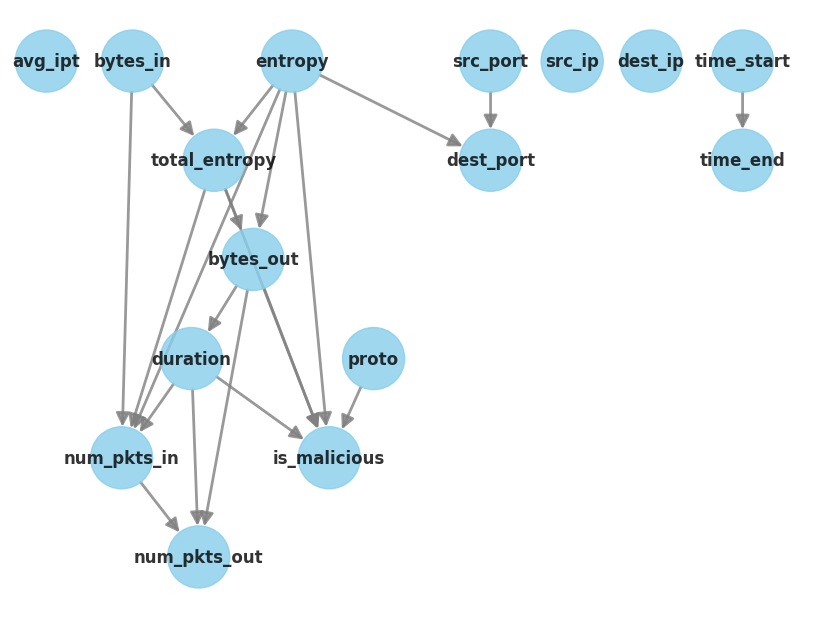

Step-2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(E[is_malicious|entropy,total_entropy])
d[bytesₒᵤₜ]                                       
Estimand assumption 1, Unconfoundedness: If U→{bytes_out} and U→is_malicious then P(is_malicious|bytes_out,entropy,total_entropy,U) = P(is_malicious|bytes_out,entropy,total_entropy)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
     d                                            
───────────(E[is_malicious|entropy,total_entropy])
d[bytesₒᵤₜ]                                       
Estimand assumption 1, Unconfoundedness: If U→{bytes_out} and U→is_malicious then P(is_malicious|bytes_out,entropy,total_entropy,U) = P(is_malicious|bytes_out,entropy,to

In [ ]:
import pandas as pd
from dowhy import CausalModel

# Load data (replace with your actual path)
df = pd.read_csv(save_dir / 'global_data.csv')  # Ensure save_dir is defined

# Create binary outcomes
df['is_malicious'] = (df['label_encoded'] == 1).astype(int)
df['is_benign'] = (df['label_encoded'] == 0).astype(int)
df['is_outlier'] = (df['label_encoded'] == 2).astype(int)

# Define treatment and outcome
treatment = "bytes_out"
outcome = "is_malicious"

# Define causal graph based on DirectLiNGAM + hypothesized edges to is_malicious
gml_graph = """
graph [
  directed 1
  node [ id "avg_ipt" label "avg_ipt" ]
  node [ id "bytes_in" label "bytes_in" ]
  node [ id "bytes_out" label "bytes_out" ]
  node [ id "num_pkts_in" label "num_pkts_in" ]
  node [ id "num_pkts_out" label "num_pkts_out" ]
  node [ id "entropy" label "entropy" ]
  node [ id "total_entropy" label "total_entropy" ]
  node [ id "src_port" label "src_port" ]
  node [ id "dest_port" label "dest_port" ]
  node [ id "proto" label "proto" ]
  node [ id "duration" label "duration" ]
  node [ id "src_ip" label "src_ip" ]
  node [ id "dest_ip" label "dest_ip" ]
  node [ id "time_start" label "time_start" ]
  node [ id "time_end" label "time_end" ]
  node [ id "is_malicious" label "is_malicious" ]

  edge [ source "bytes_in" target "num_pkts_in" ]
  edge [ source "bytes_in" target "total_entropy" ]
  edge [ source "bytes_out" target "num_pkts_out" ]
  edge [ source "bytes_out" target "duration" ]
  edge [ source "num_pkts_in" target "num_pkts_out" ]
  edge [ source "entropy" target "bytes_out" ]
  edge [ source "entropy" target "num_pkts_in" ]
  edge [ source "entropy" target "total_entropy" ]
  edge [ source "entropy" target "dest_port" ]
  edge [ source "entropy" target "is_malicious" ]
  edge [ source "total_entropy" target "bytes_out" ]
  edge [ source "total_entropy" target "num_pkts_in" ]
  edge [ source "total_entropy" target "is_malicious" ]
  edge [ source "src_port" target "dest_port" ]
  edge [ source "duration" target "num_pkts_in" ]
  edge [ source "duration" target "num_pkts_out" ]
  edge [ source "duration" target "is_malicious" ]
  edge [ source "proto" target "is_malicious" ]
  edge [ source "time_start" target "time_end" ]
  edge [ source "bytes_out" target "is_malicious" ]
]
"""

# Build the model
model = CausalModel(
    data=df,
    treatment=treatment,
    outcome=outcome,
    graph=gml_graph
)

# Optional: Visualize the graph
model.view_model(layout="dot")

# Step-2: Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print("Step-2: Identified Estimand")
print(identified_estimand)

# Step-3: Estimate the identified estimand
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    method_params={"init_params": {"fit_intercept": True, "interaction_terms": ["bytes_out*proto"]}}
)
print("\nStep-3: Causal Estimate")
print(estimate)

# Step-4: Refute results using all three methods
# Refutation 1: Random Common Cause
refute_random = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="random_common_cause"
)
print("\nStep-4: Refutation 1 - Random Common Cause")
print(refute_random)

# Refutation 2: Placebo Treatment
refute_placebo = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter",
    placebo_type="permute"
)
print("\nStep-4: Refutation 2 - Placebo Treatment")
print(refute_placebo)

# Refutation 3: Data Subset
refute_subset = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="data_subset_refuter",
    subset_fraction=0.8
)
print("\nStep-4: Refutation 3 - Data Subset")
print(refute_subset)

Step-2: Identified Estimand

What it means:
The causal effect of bytes_out (treatment) on is_malicious (outcome) is estimated using the Average Treatment Effect (ATE) via the backdoor adjustment, controlling for confounders entropy and total_entropy. The unconfoundedness assumption implies no unmeasured variables (U) affect both bytes_out and is_malicious after adjusting for these confounders.

Estimands:Backdoor:

-Valid, as it adjusts for entropy and total_entropy (confounders affecting both treatment and outcome).
- IV (Instrumental Variable): Not applicable, as no instrumental variables were found in the graph.
- Frontdoor: Not applicable, as no mediators exist between bytes_out and is_malicious.
- General Adjustment: Same as backdoor in this case, confirming the adjustment set.

Step-3:

Causal EstimateRealized Estimand: The model uses linear regression: is_malicious ~ bytes_out + entropy + total_entropy + bytes_out*proto, including an interaction term to capture how the effect of bytes_out varies by proto.
Estimate:Mean Value: -0.113974, meaning a one-unit increase in bytes_out decreases the probability of is_malicious by ~0.114 (e.g., higher outgoing bytes reduce malicious likelihood, possibly indicating normal traffic).
Conditional Estimates: The effect varies by proto:

- For proto in (-3.871, -0.0471]: Decrease of 0.112.

- For proto in (-0.0471, 39.711]: Larger decrease of 0.262 (stronger effect for certain protocols).

Interpretation: Higher bytes_out is associated with lower maliciousness, with the effect being stronger for some protocols (likely due to protocol-specific traffic patterns).

Step-4:
Refutation Results

Refutation 1 - Random Common Cause:Result: Original effect (-0.113974) vs. new effect (-0.113975), p-value = 0.96.
Meaning: Adding a random confounder doesn’t change the estimate significantly (high p-value). The model is robust to potential unmeasured confounders.

Refutation 2 - Placebo Treatment:Result: Original effect (-0.113974) vs. new effect (~0.000017), p-value = 0.92.
Meaning: Replacing bytes_out with a random (placebo) treatment yields a near-zero effect (as expected). The high p-value confirms the original effect is not due to random noise, indicating robustness.

Refutation 3 - Data Subset Original Effect: -0.113974.
New Effect: -0.113980 (almost identical to the original).
P-value: 0.94 (high, indicating no significant difference between the original and subset estimates).





### num_packets_in -> is_malicious

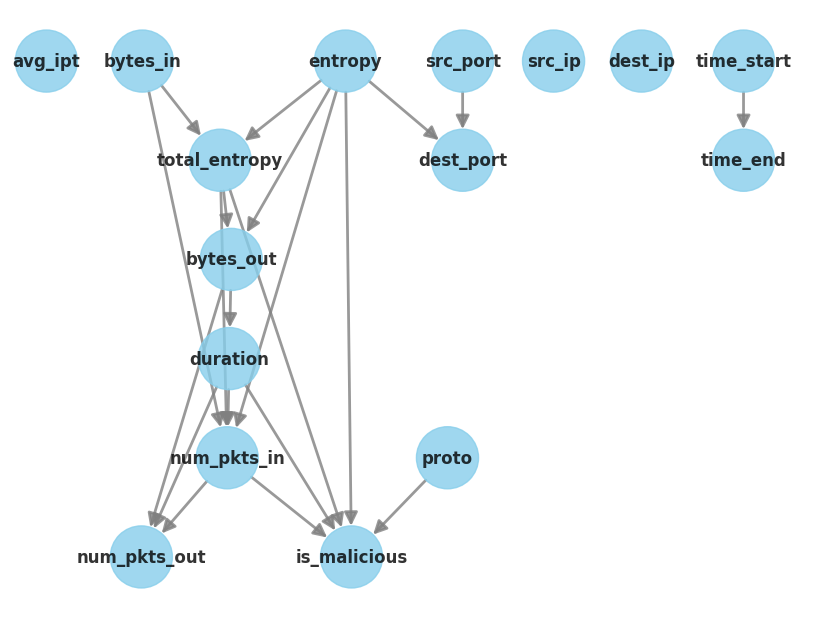

Step-2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                      
─────────────(E[is_malicious|entropy,total_entropy,duration])
d[numₚₖₜₛ ᵢₙ]                                                
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_in} and U→is_malicious then P(is_malicious|num_pkts_in,entropy,total_entropy,duration,U) = P(is_malicious|num_pkts_in,entropy,total_entropy,duration)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
      d                                                      
─────────────(E[is_malicious|entropy,total_entropy,duration])
d[numₚₖₜₛ ᵢₙ]                                                
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_in} and U→is_malicious 

In [ ]:
import pandas as pd
from dowhy import CausalModel

# Load data (replace with your actual path)
df = pd.read_csv(save_dir / 'global_data.csv')  # Ensure save_dir is defined

# Create binary outcomes
df['is_malicious'] = (df['label_encoded'] == 1).astype(int)
df['is_benign'] = (df['label_encoded'] == 0).astype(int)
df['is_outlier'] = (df['label_encoded'] == 2).astype(int)

# Define treatment and outcome
treatment = "num_pkts_in"
outcome = "is_malicious"

# Define causal graph based on DirectLiNGAM + hypothesized edges to is_malicious
gml_graph = """
graph [
  directed 1
  node [ id "avg_ipt" label "avg_ipt" ]
  node [ id "bytes_in" label "bytes_in" ]
  node [ id "bytes_out" label "bytes_out" ]
  node [ id "num_pkts_in" label "num_pkts_in" ]
  node [ id "num_pkts_out" label "num_pkts_out" ]
  node [ id "entropy" label "entropy" ]
  node [ id "total_entropy" label "total_entropy" ]
  node [ id "src_port" label "src_port" ]
  node [ id "dest_port" label "dest_port" ]
  node [ id "proto" label "proto" ]
  node [ id "duration" label "duration" ]
  node [ id "src_ip" label "src_ip" ]
  node [ id "dest_ip" label "dest_ip" ]
  node [ id "time_start" label "time_start" ]
  node [ id "time_end" label "time_end" ]
  node [ id "is_malicious" label "is_malicious" ]

  edge [ source "bytes_in" target "num_pkts_in" ]
  edge [ source "bytes_in" target "total_entropy" ]
  edge [ source "bytes_out" target "num_pkts_out" ]
  edge [ source "bytes_out" target "duration" ]
  edge [ source "num_pkts_in" target "num_pkts_out" ]
  edge [ source "entropy" target "bytes_out" ]
  edge [ source "entropy" target "num_pkts_in" ]
  edge [ source "entropy" target "total_entropy" ]
  edge [ source "entropy" target "dest_port" ]
  edge [ source "entropy" target "is_malicious" ]
  edge [ source "total_entropy" target "bytes_out" ]
  edge [ source "total_entropy" target "num_pkts_in" ]
  edge [ source "total_entropy" target "is_malicious" ]
  edge [ source "src_port" target "dest_port" ]
  edge [ source "duration" target "num_pkts_in" ]
  edge [ source "duration" target "num_pkts_out" ]
  edge [ source "duration" target "is_malicious" ]
  edge [ source "proto" target "is_malicious" ]
  edge [ source "time_start" target "time_end" ]
  edge [ source "num_pkts_in" target "is_malicious" ]
]
"""

# Build the model
model = CausalModel(
    data=df,
    treatment=treatment,
    outcome=outcome,
    graph=gml_graph
)

# Optional: Visualize the graph
model.view_model(layout="dot")

# Step-2: Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print("Step-2: Identified Estimand")
print(identified_estimand)

# Step-3: Estimate the identified estimand
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    #method_params={"init_params": {"fit_intercept": True, "interaction_terms": ["bytes_out*proto"]}}
)
print("\nStep-3: Causal Estimate")
print(estimate)

# Step-4: Refute results using all three methods
# Refutation 1: Random Common Cause
refute_random = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="random_common_cause"
)
print("\nStep-4: Refutation 1 - Random Common Cause")
print(refute_random)

# Refutation 2: Placebo Treatment
refute_placebo = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter",
    placebo_type="permute"
)
print("\nStep-4: Refutation 2 - Placebo Treatment")
print(refute_placebo)

# Refutation 3: Data Subset
refute_subset = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="data_subset_refuter",
    subset_fraction=0.8
)
print("\nStep-4: Refutation 3 - Data Subset")
print(refute_subset)

Causal Effect:

A one-unit increase in num_pkts_in has a small positive effect (~0.065) on the probability of is_malicious on average, but this varies by proto: positive for some protocols (+0.067) and negative for others (-0.142). This suggests that more incoming packets may indicate malicious activity (e.g., flooding attacks) for certain protocols, but normal traffic for others.

Robustness: All refutations (high p-values, stable estimates) confirm the estimate is reliable, not driven by noise, unmeasured confounders, or specific data subsets.




### total_entropy -> is_malicious

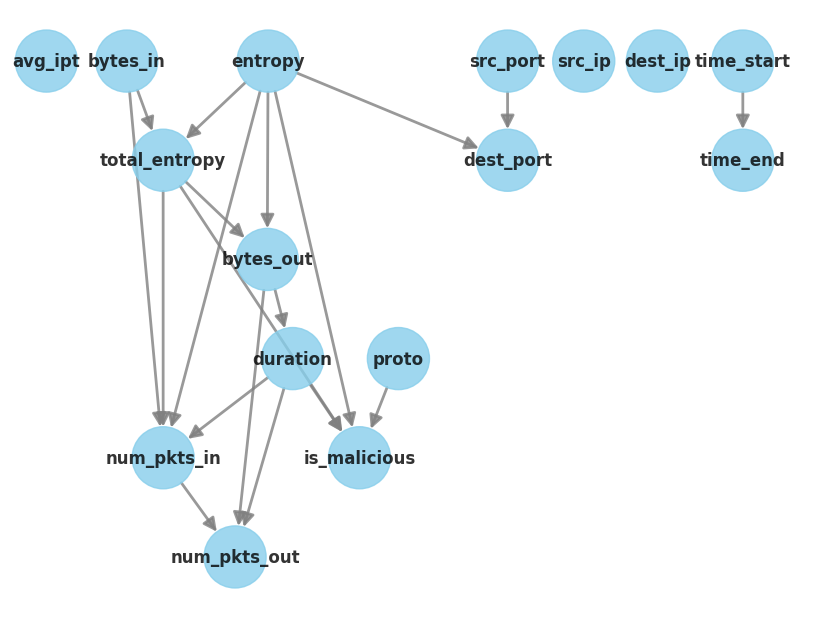

Step-2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                 
────────────────(E[is_malicious|entropy])
d[total_entropy]                         
Estimand assumption 1, Unconfoundedness: If U→{total_entropy} and U→is_malicious then P(is_malicious|total_entropy,entropy,U) = P(is_malicious|total_entropy,entropy)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                      -1⎤
 ⎢    d                    ⎛    d                      ⎞  ⎥
E⎢──────────(is_malicious)⋅⎜──────────([total_entropy])⎟  ⎥
 ⎣d[bytesᵢₙ]               ⎝d[bytesᵢₙ]                 ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→is_malicious then ¬(U →→{bytes_in})
Estimand assumption 2, Exclusion: If we remove {bytes_in}→{total_entropy}, then ¬({bytes_in}→is_malicious)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4


In [ ]:
import pandas as pd
from dowhy import CausalModel

# Load data (replace with your actual path)
df = pd.read_csv(save_dir / 'global_data.csv')  # Ensure save_dir is defined

# Create binary outcomes
df['is_malicious'] = (df['label_encoded'] == 1).astype(int)
df['is_benign'] = (df['label_encoded'] == 0).astype(int)
df['is_outlier'] = (df['label_encoded'] == 2).astype(int)

# Define treatment and outcome
treatment = "total_entropy"
outcome = "is_malicious"

# Define causal graph based on DirectLiNGAM + hypothesized edges to is_malicious
gml_graph = """
graph [
  directed 1
  node [ id "avg_ipt" label "avg_ipt" ]
  node [ id "bytes_in" label "bytes_in" ]
  node [ id "bytes_out" label "bytes_out" ]
  node [ id "num_pkts_in" label "num_pkts_in" ]
  node [ id "num_pkts_out" label "num_pkts_out" ]
  node [ id "entropy" label "entropy" ]
  node [ id "total_entropy" label "total_entropy" ]
  node [ id "src_port" label "src_port" ]
  node [ id "dest_port" label "dest_port" ]
  node [ id "proto" label "proto" ]
  node [ id "duration" label "duration" ]
  node [ id "src_ip" label "src_ip" ]
  node [ id "dest_ip" label "dest_ip" ]
  node [ id "time_start" label "time_start" ]
  node [ id "time_end" label "time_end" ]
  node [ id "is_malicious" label "is_malicious" ]

  edge [ source "bytes_in" target "num_pkts_in" ]
  edge [ source "bytes_in" target "total_entropy" ]
  edge [ source "bytes_out" target "num_pkts_out" ]
  edge [ source "bytes_out" target "duration" ]
  edge [ source "num_pkts_in" target "num_pkts_out" ]
  edge [ source "entropy" target "bytes_out" ]
  edge [ source "entropy" target "num_pkts_in" ]
  edge [ source "entropy" target "total_entropy" ]
  edge [ source "entropy" target "dest_port" ]
  edge [ source "entropy" target "is_malicious" ]
  edge [ source "total_entropy" target "bytes_out" ]
  edge [ source "total_entropy" target "num_pkts_in" ]

  edge [ source "src_port" target "dest_port" ]
  edge [ source "duration" target "num_pkts_in" ]
  edge [ source "duration" target "num_pkts_out" ]
  edge [ source "duration" target "is_malicious" ]
  edge [ source "proto" target "is_malicious" ]
  edge [ source "time_start" target "time_end" ]
  edge [ source "total_entropy" target "is_malicious" ]
]
"""

# Build the model
model = CausalModel(
    data=df,
    treatment=treatment,
    outcome=outcome,
    graph=gml_graph
)

# Optional: Visualize the graph
model.view_model(layout="dot")

# Step-2: Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print("Step-2: Identified Estimand")
print(identified_estimand)

# Step-3: Estimate the identified estimand
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    #target_units="ate",
    #method_params={"init_params": {"fit_intercept": True, "interaction_terms": ["bytes_out*proto"]}}
)
print("\nStep-3: Causal Estimate")
print(estimate)

# Step-4: Refute results using all three methods
# Refutation 1: Random Common Cause
refute_random = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="random_common_cause"
)
print("\nStep-4: Refutation 1 - Random Common Cause")
print(refute_random)

# Refutation 2: Placebo Treatment
refute_placebo = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter",
    placebo_type="permute"
)
print("\nStep-4: Refutation 2 - Placebo Treatment")
print(refute_placebo)

# Refutation 3: Data Subset
refute_subset = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="data_subset_refuter",
    subset_fraction=0.8
)
print("\nStep-4: Refutation 3 - Data Subset")
print(refute_subset)

Step-2: Identified EstimandMeaning:

Estimates the Average Treatment Effect (ATE) of total_entropy on is_malicious, adjusting for entropy as a confounder (backdoor path). Assumes no unmeasured confounders affect both total_entropy and is_malicious.

Estimands:
- Backdoor: Valid, adjusts for entropy.
- IV: Suggests bytes_in as a potential instrument, but requires bytes_in to not directly affect is_malicious (exclusion assumption).
- Frontdoor: Not applicable (no mediators).
- General Adjustment: Same as backdoor.

Step-3: Causal EstimateModel:

Linear regression: is_malicious ~ total_entropy + entropy + total_entropy*proto.
- Estimate:Mean Value: -0.0544 (one-unit increase in total_entropy decreases is_malicious probability by ~0.054).
- Conditional Estimates:proto in (-3.871, -0.0471]: Decreases by 0.055.
proto in (-0.0471, 39.711]: Increases by 0.012.

Meaning: Higher total_entropy slightly reduces malicious likelihood for some protocols but slightly increases it for others, suggesting protocol-specific effects.

Step-4: Refutations
- Random Common Cause: Original (-0.0544) vs. new (-0.0544), p=0.90. Robust to unmeasured confounders.
- Placebo Treatment: Original (-0.0544) vs. new (~0.0001), p=0.90. Effect not due to noise, robust.
- Data Subset: Original (-0.0544) vs. new (-0.0548), p=0.92. Stable across data subsets, robust.

Overall: Higher total_entropy generally reduces is_malicious probability (small effect, ~0.054), but varies by proto (negative or slightly positive). Results are robust, but the small effect size and counterintuitive negative effect (high entropy typically indicates maliciousness) suggest checking proto ranges and confounders.



### num_pkcts_out -> is_malicious

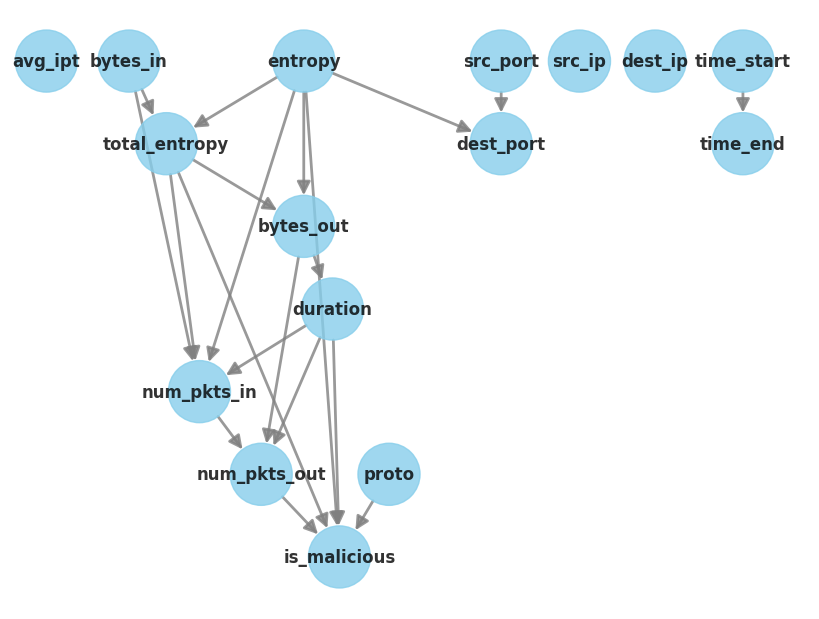

Step-2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                       
──────────────(E[is_malicious|entropy,total_entropy,duration])
d[numₚₖₜₛ ₒᵤₜ]                                                
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_out} and U→is_malicious then P(is_malicious|num_pkts_out,entropy,total_entropy,duration,U) = P(is_malicious|num_pkts_out,entropy,total_entropy,duration)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
      d                                                       
──────────────(E[is_malicious|duration,bytes_out,num_pkts_in])
d[numₚₖₜₛ ₒᵤₜ]                                                
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_out} and U→is_

In [ ]:
import pandas as pd
from dowhy import CausalModel

# Load data (replace with your actual path)
df = pd.read_csv(save_dir / 'global_data.csv')  # Ensure save_dir is defined

# Create binary outcomes
df['is_malicious'] = (df['label_encoded'] == 1).astype(int)
df['is_benign'] = (df['label_encoded'] == 0).astype(int)
df['is_outlier'] = (df['label_encoded'] == 2).astype(int)

# Define treatment and outcome
treatment = "num_pkts_out"
outcome = "is_malicious"

# Define causal graph based on DirectLiNGAM + hypothesized edges to is_malicious
gml_graph = """
graph [
  directed 1
  node [ id "avg_ipt" label "avg_ipt" ]
  node [ id "bytes_in" label "bytes_in" ]
  node [ id "bytes_out" label "bytes_out" ]
  node [ id "num_pkts_in" label "num_pkts_in" ]
  node [ id "num_pkts_out" label "num_pkts_out" ]
  node [ id "entropy" label "entropy" ]
  node [ id "total_entropy" label "total_entropy" ]
  node [ id "src_port" label "src_port" ]
  node [ id "dest_port" label "dest_port" ]
  node [ id "proto" label "proto" ]
  node [ id "duration" label "duration" ]
  node [ id "src_ip" label "src_ip" ]
  node [ id "dest_ip" label "dest_ip" ]
  node [ id "time_start" label "time_start" ]
  node [ id "time_end" label "time_end" ]
  node [ id "is_malicious" label "is_malicious" ]

  edge [ source "bytes_in" target "num_pkts_in" ]
  edge [ source "bytes_in" target "total_entropy" ]
  edge [ source "bytes_out" target "num_pkts_out" ]
  edge [ source "bytes_out" target "duration" ]
  edge [ source "num_pkts_in" target "num_pkts_out" ]
  edge [ source "entropy" target "bytes_out" ]
  edge [ source "entropy" target "num_pkts_in" ]
  edge [ source "entropy" target "total_entropy" ]
  edge [ source "entropy" target "dest_port" ]
  edge [ source "entropy" target "is_malicious" ]
  edge [ source "total_entropy" target "bytes_out" ]
  edge [ source "total_entropy" target "num_pkts_in" ]
  edge [ source "total_entropy" target "is_malicious" ]
  edge [ source "src_port" target "dest_port" ]
  edge [ source "duration" target "num_pkts_in" ]
  edge [ source "duration" target "num_pkts_out" ]
  edge [ source "duration" target "is_malicious" ]
  edge [ source "proto" target "is_malicious" ]
  edge [ source "time_start" target "time_end" ]
  edge [ source "num_pkts_out" target "is_malicious" ]
]
"""

# Build the model
model = CausalModel(
    data=df,
    treatment=treatment,
    outcome=outcome,
    graph=gml_graph
)

# Optional: Visualize the graph
model.view_model(layout="dot")

# Step-2: Identify the causal effect
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print("Step-2: Identified Estimand")
print(identified_estimand)

# Step-3: Estimate the identified estimand
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate"
)
print("\nStep-3: Causal Estimate")
print(estimate)

# Step-4: Refute results using all three methods
# Refutation 1: Random Common Cause
refute_random = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="random_common_cause"
)
print("\nStep-4: Refutation 1 - Random Common Cause")
print(refute_random)

# Refutation 2: Placebo Treatment
refute_placebo = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="placebo_treatment_refuter",
    placebo_type="permute"
)
print("\nStep-4: Refutation 2 - Placebo Treatment")
print(refute_placebo)

# Refutation 3: Data Subset
refute_subset = model.refute_estimate(
    identified_estimand,
    estimate,
    method_name="data_subset_refuter",
    subset_fraction=0.8
)
print("\nStep-4: Refutation 3 - Data Subset")
print(refute_subset)

Step-2: Identified EstimandMeaning:

Estimates the Average Treatment Effect (ATE) of num_pkts_out (number of outgoing packets) on is_malicious (binary outcome: malicious or not), adjusting for confounders entropy, total_entropy, and duration (backdoor path).

Assumes no unmeasured confounders affect both num_pkts_out and is_malicious.
Estimands:
- Backdoor: Valid, adjusts for entropy, total_entropy, duration.
- IV/Frontdoor: Not applicable (no instrumental variables or mediators).
- General Adjustment: Alternative adjustment set (duration, bytes_out, num_pkts_in), but backdoor is used.

Step-3: Causal EstimateModel:

Linear regression: is_malicious ~ num_pkts_out + entropy + total_entropy + duration + num_pkts_out*proto.

Estimate:
- Mean Value: -0.0492 (one-unit increase in num_pkts_out decreases is_malicious probability by ~0.049).
- Conditional Estimates:proto in (-3.871, -0.0471]: Decreases by 0.046.
proto in (-0.0471, 39.711]: Decreases by 0.356 (stronger effect).

Meaning: Higher num_pkts_out reduces malicious likelihood, especially for certain protocols, suggesting more outgoing packets may indicate normal traffic (e.g., legitimate data transfers).

Step-4: Refutations
- Random Common Cause: Original (-0.0492) vs. new (-0.0492), p=0.96. Robust to unmeasured confounders.
- Placebo Treatment: Original (-0.0492) vs. new (~0.0001), p=0.98. Effect not due to noise, robust.
- Data Subset: Original (-0.0492) vs. new (-0.0494), p=0.8. Stable across subsets, robust.



## for all labels and possible treatments

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
!pip install dowhy
!pip install dowhy[graphviz]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 761.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.2/399.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 21.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successfully uninstalled scipy-1.16.0
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.6.7
    Uninstalling cvxpy-1.6.7:
      Successfully uninstalled cvxpy-1.6.7



### Analyzing Treatment: total_entropy ➝ Outcome: is_malicious ###


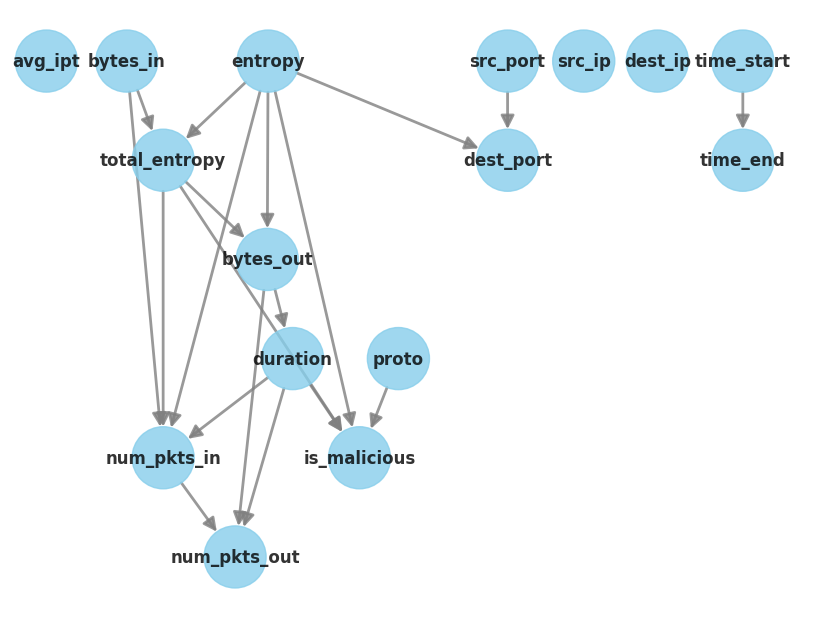

Step-2: Identified Estimand
Failed to analyze total_entropy ➝ is_malicious: module 'sympy' has no attribute 'assumptions'

### Analyzing Treatment: num_pkts_in ➝ Outcome: is_malicious ###


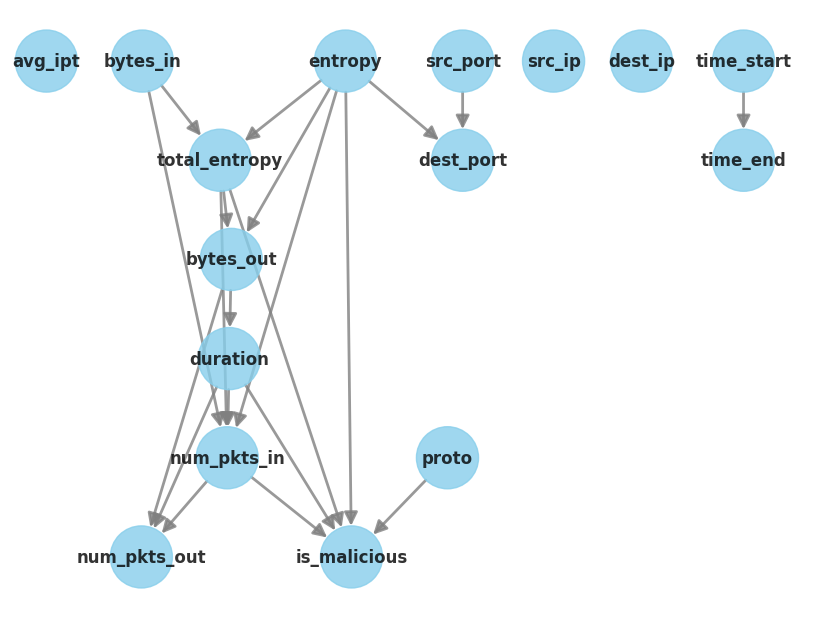

Step-2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                      
─────────────(E[is_malicious|total_entropy,duration,entropy])
d[numₚₖₜₛ ᵢₙ]                                                
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_in} and U→is_malicious then P(is_malicious|num_pkts_in,total_entropy,duration,entropy,U) = P(is_malicious|num_pkts_in,total_entropy,duration,entropy)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
      d                                                      
─────────────(E[is_malicious|entropy,total_entropy,duration])
d[numₚₖₜₛ ᵢₙ]                                                
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_in} and U→is_malicious 


Step-4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:0.06482501152818507
New effect:0.06453689577315919
p value:0.84


### Analyzing Treatment: num_pkts_out ➝ Outcome: is_malicious ###


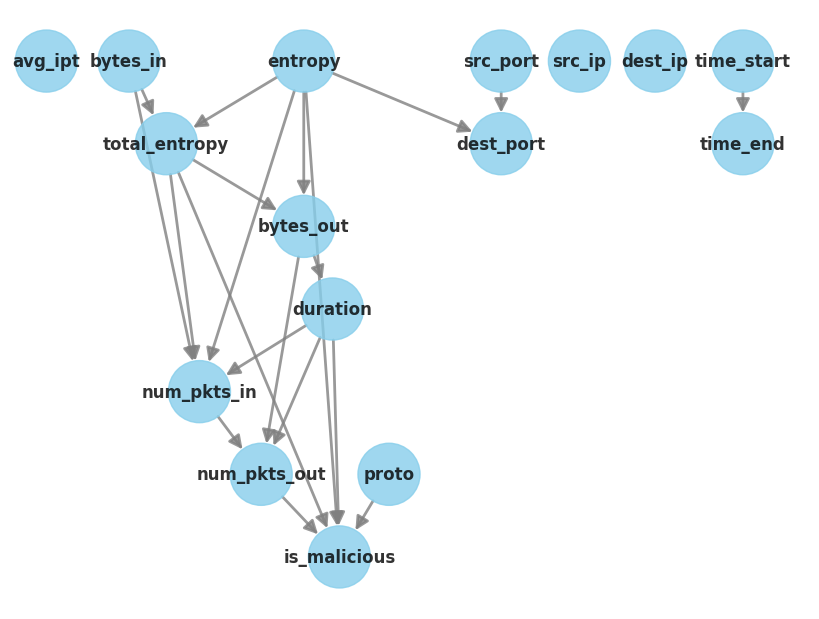

Step-2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                       
──────────────(E[is_malicious|total_entropy,duration,entropy])
d[numₚₖₜₛ ₒᵤₜ]                                                
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_out} and U→is_malicious then P(is_malicious|num_pkts_out,total_entropy,duration,entropy,U) = P(is_malicious|num_pkts_out,total_entropy,duration,entropy)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
      d                                                       
──────────────(E[is_malicious|bytes_out,num_pkts_in,duration])
d[numₚₖₜₛ ₒᵤₜ]                                                
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_out} and U→is_


Step-4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:-0.049211344550404185
New effect:-0.04916937166799411
p value:0.94


### Analyzing Treatment: bytes_out ➝ Outcome: is_malicious ###


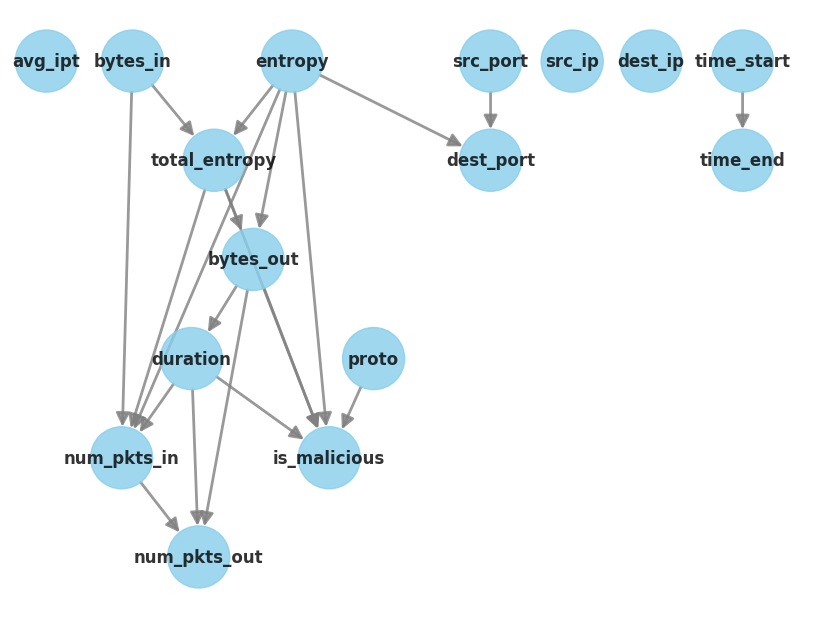

Step-2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                            
───────────(E[is_malicious|total_entropy,entropy])
d[bytesₒᵤₜ]                                       
Estimand assumption 1, Unconfoundedness: If U→{bytes_out} and U→is_malicious then P(is_malicious|bytes_out,total_entropy,entropy,U) = P(is_malicious|bytes_out,total_entropy,entropy)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
     d                                            
───────────(E[is_malicious|entropy,total_entropy])
d[bytesₒᵤₜ]                                       
Estimand assumption 1, Unconfoundedness: If U→{bytes_out} and U→is_malicious then P(is_malicious|bytes_out,entropy,total_entropy,U) = P(is_malicious|bytes_out,entropy,to


Step-4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:-0.11397426248128546
New effect:-0.11402284683578989
p value:0.88


### Analyzing Treatment: total_entropy ➝ Outcome: is_benign ###


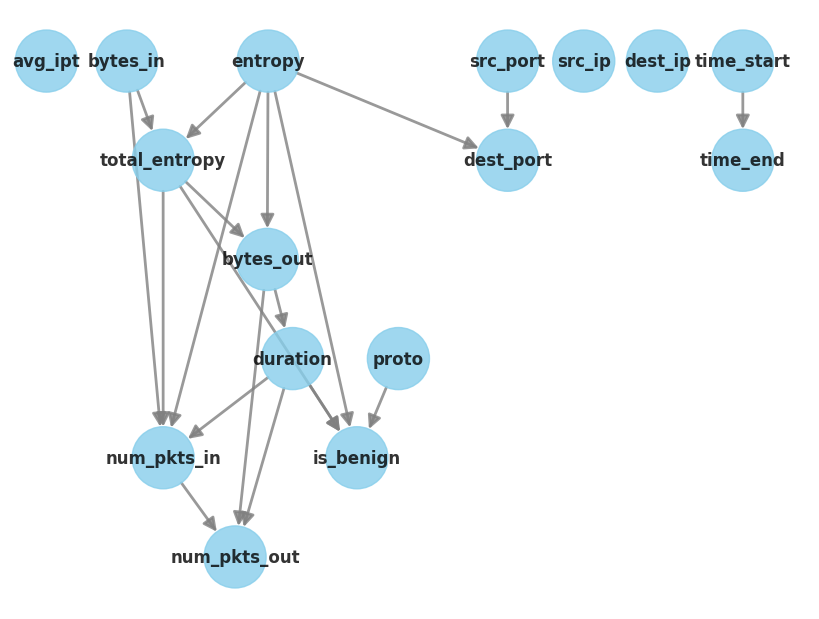

Step-2: Identified Estimand
Failed to analyze total_entropy ➝ is_benign: module 'sympy' has no attribute 'assumptions'

### Analyzing Treatment: num_pkts_in ➝ Outcome: is_benign ###


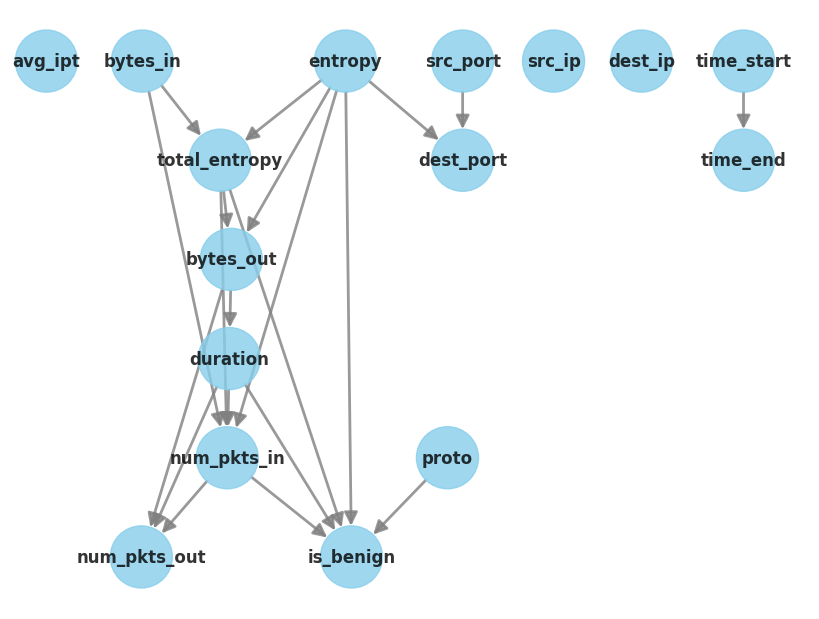

Step-2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                   
─────────────(E[is_benign|total_entropy,duration,entropy])
d[numₚₖₜₛ ᵢₙ]                                             
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_in} and U→is_benign then P(is_benign|num_pkts_in,total_entropy,duration,entropy,U) = P(is_benign|num_pkts_in,total_entropy,duration,entropy)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
      d                                                   
─────────────(E[is_benign|entropy,total_entropy,duration])
d[numₚₖₜₛ ᵢₙ]                                             
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_in} and U→is_benign then P(is_benign|num_pkts_in,e


Step-4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:-0.13480689869512663
New effect:-0.13454136572067768
p value:0.8999999999999999


### Analyzing Treatment: num_pkts_out ➝ Outcome: is_benign ###


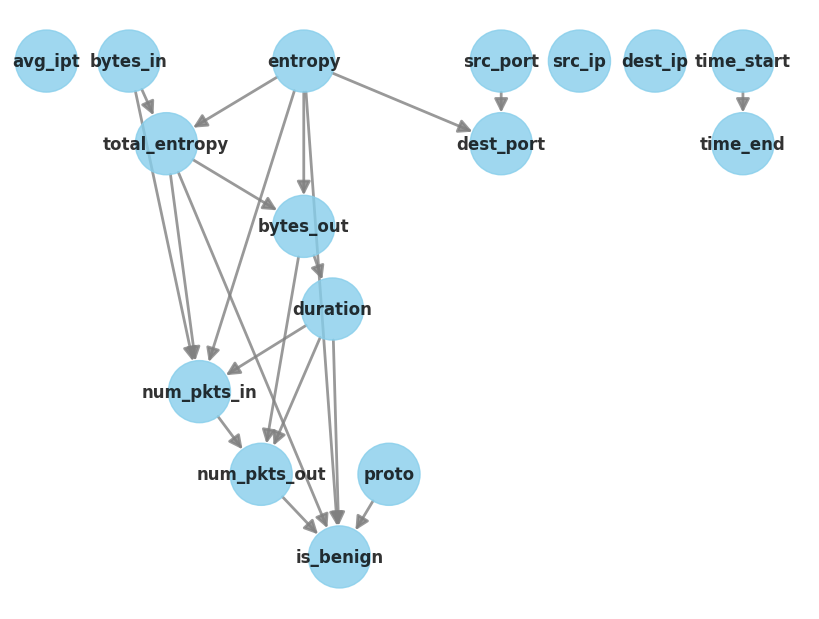

Step-2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                    
──────────────(E[is_benign|total_entropy,duration,entropy])
d[numₚₖₜₛ ₒᵤₜ]                                             
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_out} and U→is_benign then P(is_benign|num_pkts_out,total_entropy,duration,entropy,U) = P(is_benign|num_pkts_out,total_entropy,duration,entropy)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
      d                                                    
──────────────(E[is_benign|bytes_out,num_pkts_in,duration])
d[numₚₖₜₛ ₒᵤₜ]                                             
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_out} and U→is_benign then P(is_benign|num


Step-4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:0.07522561931694238
New effect:0.0750111171657838
p value:0.92


### Analyzing Treatment: bytes_out ➝ Outcome: is_benign ###


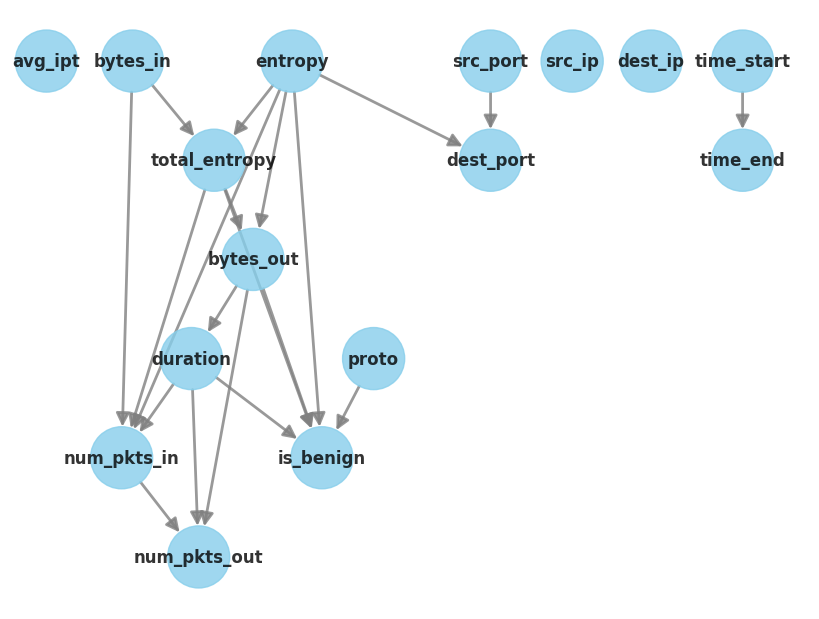

Step-2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                         
───────────(E[is_benign|total_entropy,entropy])
d[bytesₒᵤₜ]                                    
Estimand assumption 1, Unconfoundedness: If U→{bytes_out} and U→is_benign then P(is_benign|bytes_out,total_entropy,entropy,U) = P(is_benign|bytes_out,total_entropy,entropy)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
     d                                         
───────────(E[is_benign|entropy,total_entropy])
d[bytesₒᵤₜ]                                    
Estimand assumption 1, Unconfoundedness: If U→{bytes_out} and U→is_benign then P(is_benign|bytes_out,entropy,total_entropy,U) = P(is_benign|bytes_out,entropy,total_entropy)


Step-3: Causal Estima


Step-4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:0.20891668941214547
New effect:0.20882565272033482
p value:0.98


### Analyzing Treatment: total_entropy ➝ Outcome: is_outlier ###


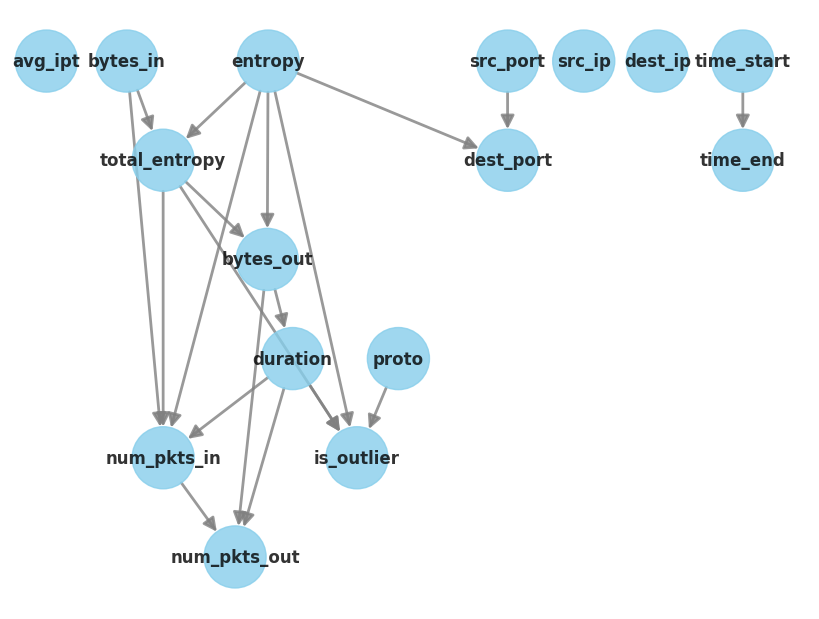

Step-2: Identified Estimand
Failed to analyze total_entropy ➝ is_outlier: module 'sympy' has no attribute 'assumptions'

### Analyzing Treatment: num_pkts_in ➝ Outcome: is_outlier ###


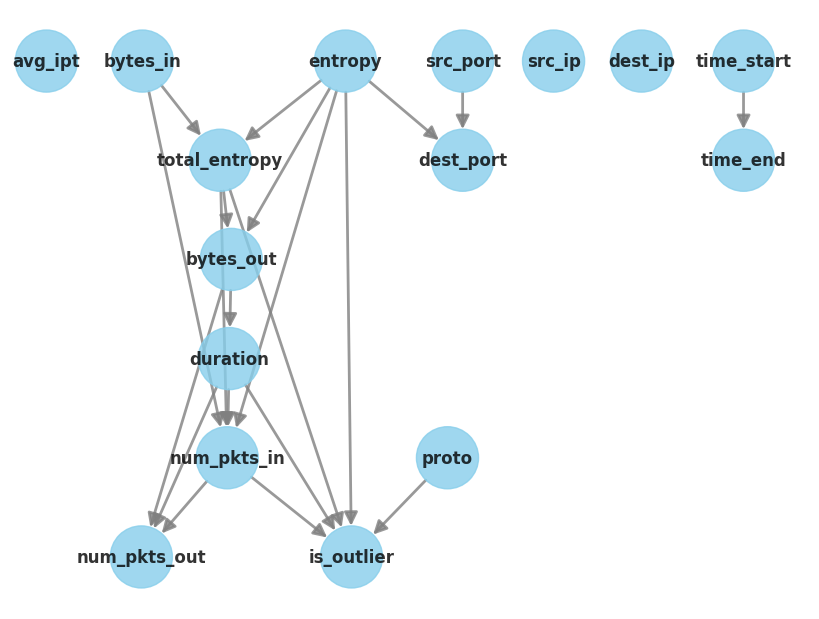

Step-2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                    
─────────────(E[is_outlier|total_entropy,duration,entropy])
d[numₚₖₜₛ ᵢₙ]                                              
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_in} and U→is_outlier then P(is_outlier|num_pkts_in,total_entropy,duration,entropy,U) = P(is_outlier|num_pkts_in,total_entropy,duration,entropy)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
      d                                                    
─────────────(E[is_outlier|entropy,total_entropy,duration])
d[numₚₖₜₛ ᵢₙ]                                              
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_in} and U→is_outlier then P(is_outlier|nu


Step-4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:0.06998188716694162
New effect:0.07022383035089554
p value:0.8400000000000001


### Analyzing Treatment: num_pkts_out ➝ Outcome: is_outlier ###


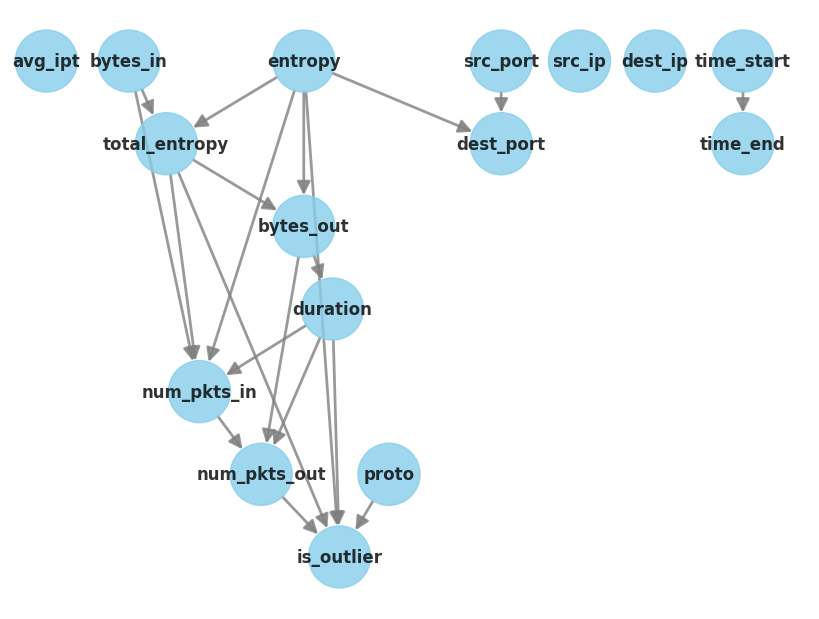

Step-2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                     
──────────────(E[is_outlier|total_entropy,duration,entropy])
d[numₚₖₜₛ ₒᵤₜ]                                              
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_out} and U→is_outlier then P(is_outlier|num_pkts_out,total_entropy,duration,entropy,U) = P(is_outlier|num_pkts_out,total_entropy,duration,entropy)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
      d                                                     
──────────────(E[is_outlier|bytes_out,num_pkts_in,duration])
d[numₚₖₜₛ ₒᵤₜ]                                              
Estimand assumption 1, Unconfoundedness: If U→{num_pkts_out} and U→is_outlier then P(is_


Step-4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:-0.026014274766538364
New effect:-0.02592215007927575
p value:0.96


### Analyzing Treatment: bytes_out ➝ Outcome: is_outlier ###


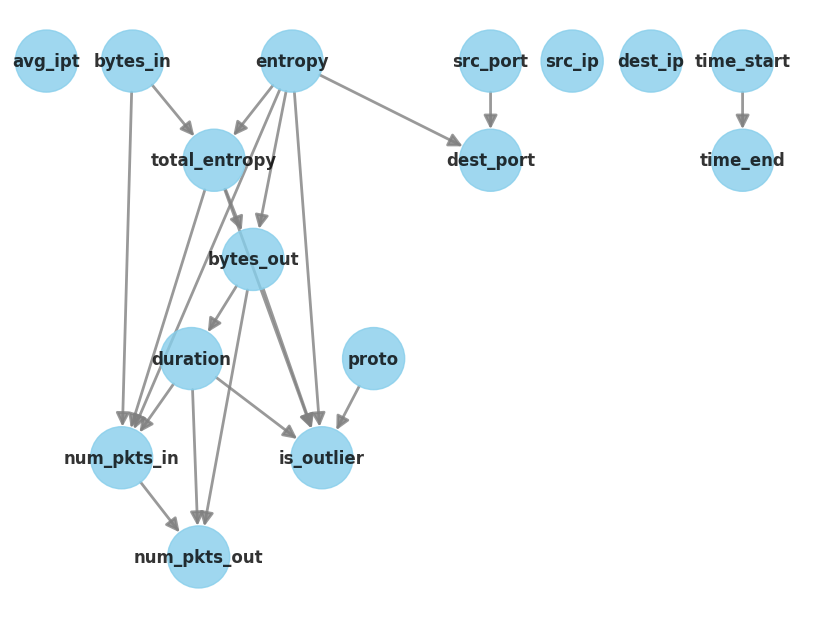

Step-2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                          
───────────(E[is_outlier|total_entropy,entropy])
d[bytesₒᵤₜ]                                     
Estimand assumption 1, Unconfoundedness: If U→{bytes_out} and U→is_outlier then P(is_outlier|bytes_out,total_entropy,entropy,U) = P(is_outlier|bytes_out,total_entropy,entropy)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
     d                                          
───────────(E[is_outlier|entropy,total_entropy])
d[bytesₒᵤₜ]                                     
Estimand assumption 1, Unconfoundedness: If U→{bytes_out} and U→is_outlier then P(is_outlier|bytes_out,entropy,total_entropy,U) = P(is_outlier|bytes_out,entropy,total_entropy)


Step-3: C

OSError: Cannot save file into a non-existent directory: '/content/drive/MyDrive/Data-science-project/journal-article/causal-inference'

In [10]:
import pandas as pd
from dowhy import CausalModel
from pathlib import Path
import numpy as np
import warnings
from pathlib import Path
# Suppress some common warnings for cleaner output
warnings.filterwarnings('ignore')


# Convert the string to a Path object
save_dir = Path('/content/drive/MyDrive/Data-science-project/journal-article/causal-inference')
output_file = save_dir / 'causal_inference_results.csv'

# Load data
df = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/global_data.csv')


# Create binary outcomes
df['is_malicious'] = (df['label_encoded'] == 1).astype(int)
df['is_benign'] = (df['label_encoded'] == 0).astype(int)
df['is_outlier'] = (df['label_encoded'] == 2).astype(int)

# Define treatment and outcome variables
treatment_vars = ['total_entropy', 'num_pkts_in', 'num_pkts_out', 'bytes_out']
outcome_vars = ['is_malicious', 'is_benign', 'is_outlier']

# Base causal graph structure from DirectLiNGAM
base_graph_edges = [
    'edge [ source "bytes_in" target "num_pkts_in" ]',
    'edge [ source "bytes_in" target "total_entropy" ]',
    'edge [ source "bytes_out" target "num_pkts_out" ]',
    'edge [ source "bytes_out" target "duration" ]',
    'edge [ source "num_pkts_in" target "num_pkts_out" ]',
    'edge [ source "entropy" target "bytes_out" ]',
    'edge [ source "entropy" target "num_pkts_in" ]',
    'edge [ source "entropy" target "total_entropy" ]',
    'edge [ source "entropy" target "dest_port" ]',
    'edge [ source "total_entropy" target "bytes_out" ]',
    'edge [ source "total_entropy" target "num_pkts_in" ]',
    'edge [ source "src_port" target "dest_port" ]',
    'edge [ source "duration" target "num_pkts_in" ]',
    'edge [ source "duration" target "num_pkts_out" ]',
    'edge [ source "time_start" target "time_end" ]',
]

# Hypothesized confounders to outcomes
confounders_to_outcome = [
    'edge [ source "entropy" target "{}" ]',
    'edge [ source "total_entropy" target "{}" ]',
    'edge [ source "duration" target "{}" ]',
    'edge [ source "proto" target "{}" ]',
]

# Initialize results list for CSV
results = []

# Loop through each treatment and outcome combination
for outcome in outcome_vars:
    for treatment in treatment_vars:
        print(f"\n### Analyzing Treatment: {treatment} ➝ Outcome: {outcome} ###")

        try:
            # Dynamically create graph with treatment → outcome and confounders
            outcome_edge = f'edge [ source "{treatment}" target "{outcome}" ]'
            confounder_edges = [edge.format(outcome) for edge in confounders_to_outcome]
            # Ensure treatment is not a confounder to itself
            confounder_edges = [edge for edge in confounder_edges if treatment not in edge]
            graph_edges = base_graph_edges + confounder_edges + [outcome_edge]

            # Join edges with newline and indentation outside f-string
            edges_str = '\n  '.join(graph_edges)

            # Construct GML graph
            gml_graph = f"""
graph [
  directed 1
  node [ id "avg_ipt" label "avg_ipt" ]
  node [ id "bytes_in" label "bytes_in" ]
  node [ id "bytes_out" label "bytes_out" ]
  node [ id "num_pkts_in" label "num_pkts_in" ]
  node [ id "num_pkts_out" label "num_pkts_out" ]
  node [ id "entropy" label "entropy" ]
  node [ id "total_entropy" label "total_entropy" ]
  node [ id "src_port" label "src_port" ]
  node [ id "dest_port" label "dest_port" ]
  node [ id "proto" label "proto" ]
  node [ id "duration" label "duration" ]
  node [ id "src_ip" label "src_ip" ]
  node [ id "dest_ip" label "dest_ip" ]
  node [ id "time_start" label "time_start" ]
  node [ id "time_end" label "time_end" ]
  node [ id "{outcome}" label "{outcome}" ]
  {edges_str}
]
"""

            # Build the model
            model = CausalModel(
                data=df,
                treatment=treatment,
                outcome=outcome,
                graph=gml_graph
            )

            # Optional: Visualize the graph
            model.view_model(layout="dot")

            # Step-2: Identify the causal effect
            identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
            print("Step-2: Identified Estimand")
            print(identified_estimand)

            # Step-3: Estimate the identified estimand
            estimate = model.estimate_effect(
                identified_estimand,
                method_name="backdoor.linear_regression",
                target_units="ate",
                #method_params={"init_params": {"fit_intercept": True, "interaction_terms": [f"{treatment}*proto"]}}
            )
            print("\nStep-3: Causal Estimate")
            print(estimate)

            # Extract conditional estimates if available
            conditional_estimates = getattr(estimate, 'conditional_estimates', None)
            conditional_str = ""
            if conditional_estimates is not None:
                conditional_str = str(conditional_estimates).replace('\n', '; ')

            # Step-4: Refute results
            refute_random = model.refute_estimate(
                identified_estimand, estimate, method_name="random_common_cause"
            )
            print("\nStep-4: Refutation 1 - Random Common Cause")
            print(refute_random)

            refute_placebo = model.refute_estimate(
                identified_estimand, estimate, method_name="placebo_treatment_refuter", placebo_type="permute"
            )
            print("\nStep-4: Refutation 2 - Placebo Treatment")
            print(refute_placebo)

            refute_subset = model.refute_estimate(
                identified_estimand, estimate, method_name="data_subset_refuter", subset_fraction=0.8
            )
            print("\nStep-4: Refutation 3 - Data Subset")
            print(refute_subset)

            # Store results
            result = {
                'Treatment': treatment,
                'Outcome': outcome,
                'ATE': estimate.value,
                'Conditional_Estimates': conditional_str,
                'Results_Estimate': str(estimate),
                'Random_Common_Cause_New_Effect': refute_random.new_effect,
                'Random_Common_Cause_p_value': refute_random.refutation_result['p_value'],
                'Placebo_Treatment_New_Effect': refute_placebo.new_effect,
                'Placebo_Treatment_p_value': refute_placebo.refutation_result['p_value'],
                'Data_Subset_New_Effect': refute_subset.new_effect,
                'Data_Subset_p_value': refute_subset.refutation_result['p_value']
            }
            results.append(result)

        except Exception as e:
            print(f"Failed to analyze {treatment} ➝ {outcome}: {e}")
            results.append({
                'Treatment': treatment,
                'Outcome': outcome,
                'ATE': np.nan,
                'Conditional_Estimates': '',
                'Random_Common_Cause_New_Effect': np.nan,
                'Random_Common_Cause_p_value': np.nan,
                'Placebo_Treatment_New_Effect': np.nan,
                'Placebo_Treatment_p_value': np.nan,
                'Data_Subset_New_Effect': np.nan,
                'Data_Subset_p_value': np.nan
            })

# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv(output_file, index=False)
print(f"\nResults saved to {output_file}")

In [11]:
results_df.to_csv(output_file, index=False)
print(f"\nResults saved to {output_file}")


Results saved to /content/drive/MyDrive/Data-science-project/journal-article/causal-inference/causal_inference_results.csv


In [13]:
results_df

,Treatment,Outcome,ATE,Conditional_Estimates,Random_Common_Cause_New_Effect,Random_Common_Cause_p_value,Placebo_Treatment_New_Effect,Placebo_Treatment_p_value,Data_Subset_New_Effect,Data_Subset_p_value,Results_Estimate
0,total_entropy,is_malicious,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,num_pkts_in,is_malicious,0.064825,"__categorical__proto; (-3.871, -0.0471] 0.0...",0.064825,0.92,-0.000013,0.98,0.064537,0.84,*** Causal Estimate ***\n\n## Identified estim...
2,num_pkts_out,is_malicious,-0.049211,"__categorical__proto; (-3.871, -0.0471] -0.0...",-0.049212,0.94,-0.000069,0.90,-0.049169,0.94,*** Causal Estimate ***\n\n## Identified estim...
3,bytes_out,is_malicious,-0.113974,"__categorical__proto; (-3.871, -0.0471] -0.1...",-0.113974,0.92,-0.000015,0.96,-0.114023,0.88,*** Causal Estimate ***\n\n## Identified estim...
4,total_entropy,is_benign,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,num_pkts_in,is_benign,-0.134807,"__categorical__proto; (-3.871, -0.0471] -0.1...",-0.134807,0.96,0.000103,0.94,-0.134541,0.90,*** Causal Estimate ***\n\n## Identified estim...
6,num_pkts_out,is_benign,0.075226,"__categorical__proto; (-3.871, -0.0471] 0.0...",0.075226,0.84,0.000069,0.90,0.075011,0.92,*** Causal Estimate ***\n\n## Identified estim...
7,bytes_out,is_benign,0.208917,"__categorical__proto; (-3.871, -0.0471] 0.2...",0.208917,0.98,-0.000066,0.94,0.208826,0.98,*** Causal Estimate ***\n\n## Identified estim...
8,total_entropy,is_outlier,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,num_pkts_in,is_outlier,0.069982,"__categorical__proto; (-3.871, -0.0471] 0.0...",0.069981,0.98,0.000049,0.98,0.070224,0.84,*** Causal Estimate ***\n\n## Identified estim...


## playing around: trials benign only from directlingam

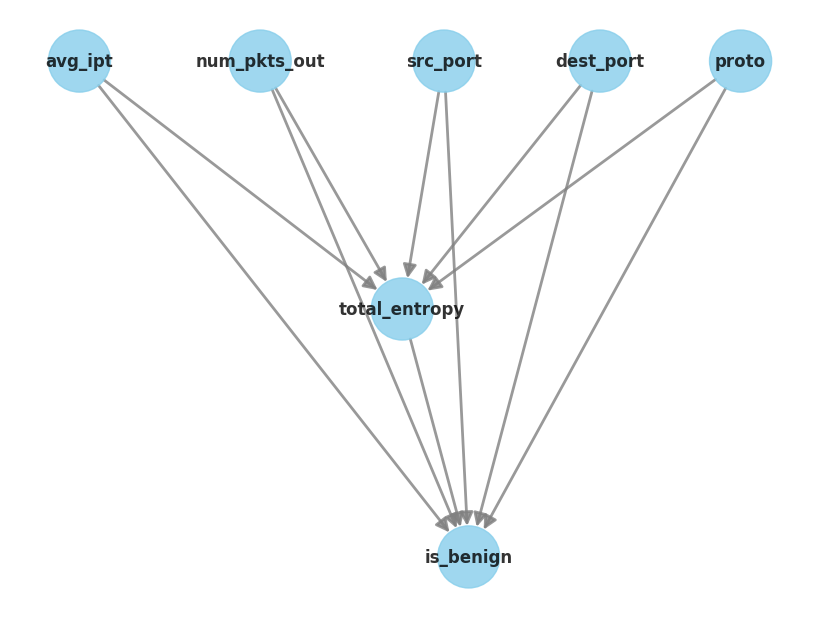

ATE: 0.08406282607977389
ATE: *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                                   
────────────────(E[is_benign|proto,dest_port,num_pkts_out,src_⟨port,⟩_ipt])
d[total_entropy]                                                           
Estimand assumption 1, Unconfoundedness: If U→{total_entropy} and U→is_benign then P(is_benign|total_entropy,proto,dest_port,num_pkts_out,src_port,avg_ipt,U) = P(is_benign|total_entropy,proto,dest_port,num_pkts_out,src_port,avg_ipt)

## Realized estimand
b: is_benign~total_entropy+proto+dest_port+num_pkts_out+src_port+avg_ipt
Target units: ate

## Estimate
Mean value: 0.08406282607977389


Step-3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d   

In [5]:
import pandas as pd
from dowhy import CausalModel
from pathlib import Path
import numpy as np
import warnings
from pathlib import Path
# Suppress some common warnings for cleaner output
warnings.filterwarnings('ignore')


# Convert the string to a Path object
save_dir = Path('/content/drive/MyDrive/Data-science-project/journal-article/causal-inference')
output_file = save_dir / 'causal_inference_results.csv'

# Load data
df = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/global_data.csv')


# Create binary outcomes
df['is_malicious'] = (df['label_encoded'] == 1).astype(int)
df['is_benign'] = (df['label_encoded'] == 0).astype(int)
df['is_outlier'] = (df['label_encoded'] == 2).astype(int)




model = CausalModel(
    data=df,  # make sure it includes 'is_benign'
    treatment="total_entropy",
    outcome="is_benign",
    common_causes=["avg_ipt", "num_pkts_out", "src_port", "dest_port", "proto"]
)

model.view_model(layout="dot")

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print("ATE:", estimate.value)
print("ATE:", estimate)


# Step-3: Estimate the identified estimand
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression",
    target_units="ate",
    #method_params={"init_params": {"fit_intercept": True, "interaction_terms": [f"{treatment}*proto"]}}
)
print("\nStep-3: Causal Estimate")
print(estimate)

# Extract conditional estimates if available
conditional_estimates = getattr(estimate, 'conditional_estimates', None)
conditional_str = ""
if conditional_estimates is not None:
    conditional_str = str(conditional_estimates).replace('\n', '; ')

# Step-4: Refute results
refute_random = model.refute_estimate(
    identified_estimand, estimate, method_name="random_common_cause"
)
print("\nStep-4: Refutation 1 - Random Common Cause")
print(refute_random)

refute_placebo = model.refute_estimate(
    identified_estimand, estimate, method_name="placebo_treatment_refuter", placebo_type="permute"
)
print("\nStep-4: Refutation 2 - Placebo Treatment")
print(refute_placebo)

refute_subset = model.refute_estimate(
    identified_estimand, estimate, method_name="data_subset_refuter", subset_fraction=0.8
)
print("\nStep-4: Refutation 3 - Data Subset")
print(refute_subset)

You are testing the causal effect of total_entropy on is_benign traffic.

The null hypothesis in each refutation test is:

"total_entropy has no causal effect on is_benign."

So...

✅ How to interpret the p-value in this case:
p-value close to 0 → The result you got is very unlikely if the null were true → Strong evidence that total_entropy does affect is_benign.

p-value close to 1 → The result you got is very likely even if total_entropy had no real effect → Suggests total_entropy might not actually affect is_benign.

You tested whether total_entropy has a causal effect on is_benign.

Your refutation p-values were:

Random Common Cause p = 0.96

Placebo Treatment p = 0.84

Subset Validation p = 1.0

✅ Interpretation:
These are all high p-values (close to 1), which suggests:

The estimated causal effect of total_entropy on is_benign could easily have occurred by chance — it’s not statistically robust.

🧠 Final takeaway:
Yes — based on these refutations, your conclusion should be:

total_entropy does not have a strong or reliable causal effect on is_benign.

It might look like there’s a small effect (ATE ≈ 0.084), but the high p-values suggest this effect isn’t statistically significant or robust.